In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier_color/color.csv'
model_save_path = 'model/keypoint_classifier_color/color.keras'
tflite_save_path = 'model/keypoint_classifier_color/color.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 3

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, 4 + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
print(X_dataset.shape)
print(y_dataset.shape)
print(X_dataset)
print(y_dataset)

(1536, 4)
(1536,)
[[ 57.27238   74.362854 112.1581     0.      ]
 [ 56.41714   73.17333  110.53048    0.      ]
 [ 58.575237  75.809525 113.75238    0.      ]
 ...
 [ 27.038572  48.989525 101.97476    0.      ]
 [ 23.190475  37.049522  69.54667    0.      ]
 [ 22.786667  40.000954  80.89714    0.      ]]
[1 1 1 ... 1 1 1]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((4, )), #number of additional para
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 20)                100       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 343 (1.34 KB)
Trainable params: 343 (1.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/9 [==>...........................] - ETA: 5s - loss: 8.7249 - accuracy: 0.5625
Epoch 1: saving model to model/keypoint_classifier_color\color.keras
9/9 [==============================] - 1s 38ms/step - loss: 8.3928 - accuracy: 0.5556 - val_loss: 1.0872 - val_accuracy: 0.9375
Epoch 2/1000
1/9 [==>...........................] - ETA: 0s - loss: 5.7122 - accuracy: 0.6016
Epoch 2: saving model to model/keypoint_classifier_color\color.keras
9/9 [==============================] - 0s 12ms/step - loss: 6.5128 - accuracy: 0.5911 - val_loss: 0.8401 - val_accuracy: 0.9740
Epoch 3/1000
1/9 [==>...........................] - ETA: 0s - loss: 5.0545 - accuracy: 0.6641
Epoch 3: saving model to model/keypoint_classifier_color\color.keras
9/9 [==============================] - 0s 12ms/step - loss: 5.1230 - accuracy: 0.6146 - val_loss: 0.7501 - val_accuracy: 0.9661
Epoch 4/1000
1/9 [==>...........................] - ETA: 0s - loss: 5.9655 - accuracy: 0.6172
Epoch 4: saving model to model/ke

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 4ms/step - loss: 0.3411 - accuracy: 0.9505


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 122ms/step
[0.27735978 0.7107998  0.01184041]
1


# Confusion matrix

12/12 [==============================] - 0s 1ms/step


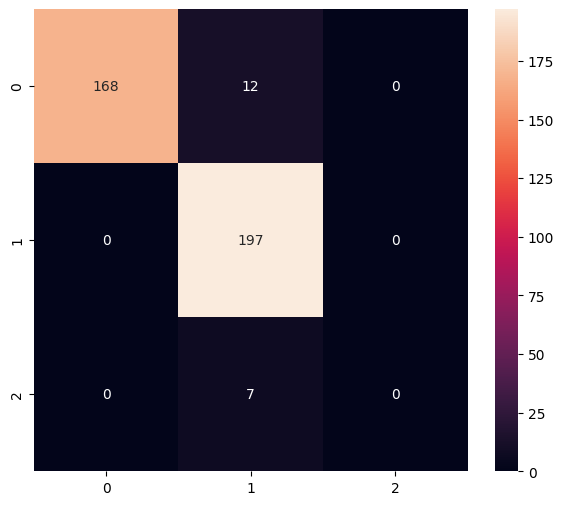

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.93      0.97       180
           1       0.91      1.00      0.95       197
           2       0.00      0.00      0.00         7

    accuracy                           0.95       384
   macro avg       0.64      0.64      0.64       384
weighted avg       0.94      0.95      0.94       384



C:\Users\samra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\samra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\samra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\samra\AppData\Local\Temp\tmpi4e978s7\assets


INFO:tensorflow:Assets written to: C:\Users\samra\AppData\Local\Temp\tmpi4e978s7\assets


3460

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.27735966 0.7107999  0.0118404 ]
1
